In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools, spike_tools



# 1.1.1 
I_min = (LIF.FIRING_THRESHOLD - LIF.V_REST) / LIF.MEMBRANE_RESISTANCE
print("1.1.1 Compute minimal amplitude")
print("\tI_min = {0}\n".format(I_min))



1.1.1 Compute minimal amplitude
	I_min = 2.0000000000000005e-09



1.1.2 Minimal current (simulation)
	nr of spikes: 0


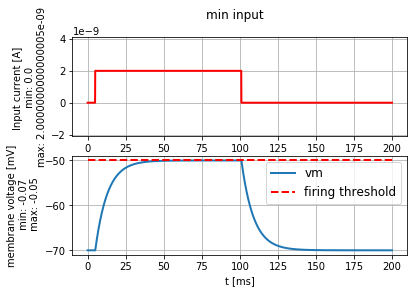

In [2]:
# 1.1.2

print("1.1.2 Minimal current (simulation)")

# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=I_min)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("\tnr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

1.2. Exercise: f-I Curve
	2. f = 1/T = 1/3ms = 1000Hz (???)
	3.


WARNING    /Users/diogoramalho/opt/anaconda3/envs/bmnn/lib/python3.8/site-packages/brian2/units/fundamentalunits.py:230: RuntimeWarning: Mean of empty slice.
  return Quantity(func(np.array(x, copy=False), *args, **kwds), dim=x.dim)
 [py.warnings]
WARNING    /Users/diogoramalho/opt/anaconda3/envs/bmnn/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]


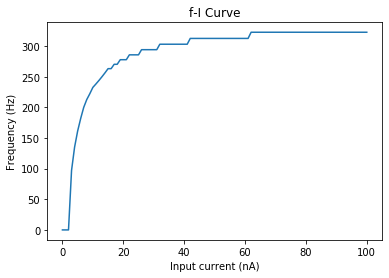

In [3]:
import matplotlib.pyplot as plt

print("1.2. Exercise: f-I Curve")

print("\t2. f = 1/T = 1/3ms = 1000Hz (???)")

print("\t3.")


freqs = []

for I in range(101):
    step_current = input_factory.get_step_current(t_start=5, t_end=500, unit_time=b2.ms, amplitude=I*b2.nA)
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms, abs_refractory_period=3*b2.ms)
    spike_stats = spike_tools.get_spike_train_stats(spike_monitor)
    f = 1/spike_stats.mean_isi
    if np.isnan(f):
        f = 0 * b2.Hz * b2.Hz
    freqs += [f]

I = [i for i in range(101)]

plt.xlabel("Input current (nA)")
plt.ylabel("Frequency (Hz)")
plt.title("f-I Curve")
plt.plot(I, freqs)

1.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron
	1. Get a random parameter set
Resting potential: -0.06
Reset voltage: -0.068
Firing threshold: -0.016
Membrane resistance: 9000000.0
Membrane time-scale: 0.024
Absolute refractory period: 0.002


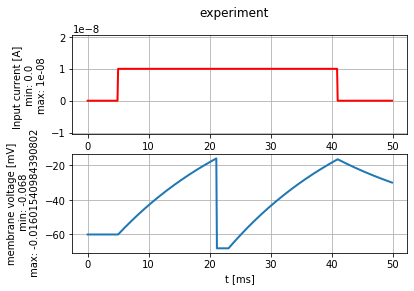

In [10]:
print("1.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron")


# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=5, t_end=40, unit_time=b2.ms, amplitude= 10 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

1.4. Exercise: Sinusoidal input current and subthreshold response
	1.4.1
	nr of spikes: 0
	1.4.2
	1.4.3


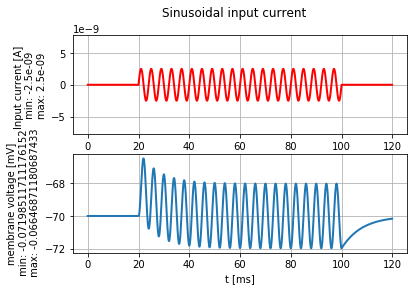

In [12]:
print("1.4. Exercise: Sinusoidal input current and subthreshold response")
print("\t1.4.1")

# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("\tnr of spikes: {}".format(spike_monitor.count[0]))

print("\t1.4.2")
print("\t1.4.3")